In [1]:
# Nov 13, 2021
# importing the important library that will be used
import pandas as pd
from sklearn.model_selection import train_test_split as tts
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# importing dataset 
# Task 1(a): - import dataset
cal = pd.read_excel(r'housing.xlsx')

In [3]:
#The project aims at building a model of housing prices to predict median house values in California using the provided dataset. 
#This model should learn from the data and be able to predict the median housing price in any district, given all the other metrics.

In [4]:
# task 1(b):-  top five rows of the dataset
cal.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [5]:
# data info
cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [6]:
# checking the missing values
cal.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [7]:
#shape of the dataset: rows and columns in the dataset
cal.shape

(20640, 10)

In [8]:
# here output variable is "median house price" colnum
# no. of rows for each value of ocean_Proximity due to the categorical values
cal['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
# task 3
# encode the ocean_proximity
# convert it into dummy values
df = pd.get_dummies(cal["ocean_proximity"])
df.head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0


In [10]:
# add df on the original cal df
cal_cb = pd.concat([cal,df],axis = 1) # rowwise combination, for stacked axis =0
cal_cb.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600,0,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500,0,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100,0,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300,0,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200,0,0,0,1,0


In [11]:
# drop the ocean_proximity from dataset
cal_cb.drop("ocean_proximity", axis = 1, inplace = True)
cal_cb.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,0,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,0,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,0,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,0,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,0,0,0,1,0


array([[<AxesSubplot:title={'center':'total_bedrooms'}>]], dtype=object)

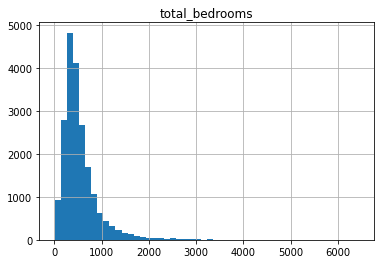

In [12]:
# Task 2:-  missing values treatment
# from the step row 6, we come to know that there are total 207 missing values in the col "total_bedrroom"
# so by creating the histogram and extracting the descriptive stats info of total_bedrooms we will come to know how to deal with it
cal_cb.hist('total_bedrooms', bins = 50)

In [13]:
# brief description of total_bredrooms
cal_cb.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,0.442636,0.317393,0.000242,0.110950,0.128779
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,0.496710,0.465473,0.015563,0.314077,0.334963
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
# data is titled towards higher one
# look at std dev of total_bedrooms i.e. 421.38
# fill the NA with mean of respective col
cal_cb['total_bedrooms'] = np.where(cal_cb['total_bedrooms'].isnull(), 
                                    cal_cb["total_bedrooms"].mean(),
                                    cal_cb['total_bedrooms'])
print("Mean:",cal_cb['total_bedrooms'].mean())
#checking of the null values
#method 1:
cal_cb.info()

Mean: 537.8705525375639
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   <1H OCEAN           20640 non-null  uint8  
 10  INLAND              20640 non-null  uint8  
 11  ISLAND              20640 non-null  uint8  
 12  NEAR BAY            20640 non-null  uint8  
 13  NEAR OCEAN          20640 non-null  uint8  
dtypes: float64(4), int64(5), uint8(5)
memory usage: 1.5 MB


In [15]:
#method 2
cal_cb.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
<1H OCEAN             0
INLAND                0
ISLAND                0
NEAR BAY              0
NEAR OCEAN            0
dtype: int64

In [16]:
# task 1(c):- extract i/p (x) and o/p (y) from the dataset
# output var = median_house_value 
y = cal_cb['median_house_value']
y[:5]

0    452600
1    358500
2    352100
3    341300
4    342200
Name: median_house_value, dtype: int64

In [17]:
# input Var
X = cal_cb.drop('median_house_value', axis = 1)
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,0,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,0,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,0,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,0,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,0,0,0,1,0


In [18]:
# task 4: split data into train and test into 0.8 and 0.2 
X_train, X_test, y_train, y_test = tts( X, y, test_size=0.2)

In [19]:
# checking all the values one by one to confirm 
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
10205,-117.93,33.88,45,1306,293.0,585,260,4.0812,1,0,0,0,0
19998,-119.45,36.09,18,408,82.0,253,75,2.0313,0,1,0,0,0
10351,-117.68,33.63,16,5218,1187.0,2701,1125,3.9290,1,0,0,0,0
12575,-121.42,38.53,36,1581,288.0,832,291,3.4083,0,1,0,0,0
2702,-115.57,32.85,17,1039,256.0,728,246,1.7411,0,1,0,0,0


In [20]:
X_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
1875,-119.98,38.96,25,2443,444.0,868,342,3.5417,0,1,0,0,0
1571,-122.01,37.83,30,3917,549.0,1330,544,6.5617,0,0,0,1,0
3114,-117.66,35.61,5,5735,932.0,2623,862,4.8494,0,1,0,0,0
9568,-120.62,37.35,20,1457,372.0,1000,346,1.4615,0,1,0,0,0
463,-122.27,37.87,49,1350,368.0,707,350,2.8846,0,0,0,1,0


In [21]:
y_train.head()

10205    241700
19998    112500
10351    143100
12575     71800
2702      63500
Name: median_house_value, dtype: int64

In [22]:
y_test.head()

1875    114800
1571    386600
3114     87200
9568     69200
463     211300
Name: median_house_value, dtype: int64

In [23]:
# task 5: standazing the data
# not required for the output
# for test data we will use the fitted values of training mean an std
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()

In [24]:
# training dataset for imput - we will fit the parameters and transform it
X_tr_sc = scaler.fit_transform(X_train)
print(X_tr_sc)

[[ 0.8197489  -0.82054053  1.30260534 ... -0.01740407 -0.35152673
  -0.38234682]
 [ 0.05876173  0.21737133 -0.84447932 ... -0.01740407 -0.35152673
  -0.38234682]
 [ 0.94491127 -0.93795137 -1.00352263 ... -0.01740407 -0.35152673
  -0.38234682]
 ...
 [-0.86243327  1.09560444  1.70021361 ... -0.01740407 -0.35152673
  -0.38234682]
 [-1.33805026  2.14290917  0.03025888 ... -0.01740407 -0.35152673
  -0.38234682]
 [ 1.63580752 -0.91446921 -1.48065255 ... -0.01740407 -0.35152673
  -0.38234682]]


In [25]:
# test stdz data
X_ts_sc = scaler.transform(X_test)
print(X_ts_sc)

[[-0.20658248  1.56524782 -0.28782774 ... -0.01740407 -0.35152673
  -0.38234682]
 [-1.22290088  1.03455081  0.10978053 ... -0.01740407  2.84473391
  -0.38234682]
 [ 0.95492426 -0.00805749 -1.87826083 ... -0.01740407 -0.35152673
  -0.38234682]
 ...
 [ 1.16519703 -1.35593398  1.22308369 ... -0.01740407 -0.35152673
   2.61542651]
 [ 0.59445665 -0.76887976 -0.60591436 ... -0.01740407 -0.35152673
  -0.38234682]
 [-1.58837499  1.50419418 -1.32160925 ... -0.01740407 -0.35152673
  -0.38234682]]


In [26]:
# task 6:  LR Model
from sklearn.linear_model import LinearRegression as LR
model = LR(fit_intercept=True,copy_X=True)

In [27]:
# fitting model by using scalar train dataset
model.fit(X_tr_sc, y_train)

LinearRegression()

In [28]:
# score parameter
model.score(X_ts_sc, y_test)

0.6489996911611332

In [29]:
# model coff values
model.coef_

array([-54161.78239814, -55467.44591746,  12943.8148348 ,  -9891.36263061,
        28849.70750265, -44806.90420039,  30494.85949248,  73560.50690827,
         6024.2807455 , -12621.13034374,   2900.12947019,   3030.62218014,
         5631.69231977])

In [30]:
# intercept of the model
model.intercept_

207990.24848594933

In [31]:
# prediction of the output
y_pred = model.predict(X_ts_sc)
y_pred[:5]

array([ 92454.25946284, 333506.98534122, 136722.85914202,  60986.08887794,
       226024.47683171])

In [32]:
# error of the model
# rmse = (sqrt(sum(actual-predict)**2))
# Method 1
from sklearn.metrics import mean_squared_error as msq
mse = msq(y_test, y_pred)
mse

4448392405.323642

In [33]:
# Method 2
MSE = np.square(np.subtract(y_test,y_pred)).mean()
MSE

4448392405.32364

In [34]:
# Task 7: -
# Bonus exercise: Perform Linear Regression with one independent variable :
# Extract just the median_income column from the independent variables (from X_train and X_test).
# Perform Linear Regression to predict housing values based on median_income.
# Predict output for test dataset using the fitted model.
# Plot the fitted model for training data as well as for test data to check if the fitted model satisfies the test data.

In [35]:
# Task 7(a):
X = cal_cb[['median_income']]
X
x_tr = X_train[["median_income"]]
print(x_tr.shape)
x_tr.head()

(16512, 1)


,median_income
10205,4.0812
19998,2.0313
10351,3.9290
12575,3.4083
2702,1.7411


In [36]:
x_ts = X_test[["median_income"]]
print(x_ts.shape)
x_ts.head()

(4128, 1)


,median_income
1875,3.5417
1571,6.5617
3114,4.8494
9568,1.4615
463,2.8846


In [37]:
Y = cal_cb['median_house_value']
Y[:5]

0    452600
1    358500
2    352100
3    341300
4    342200
Name: median_house_value, dtype: int64

In [38]:
# task 7(b)
# fitting model into one indepedent variable
model.fit(x_tr, y_train)

LinearRegression()

In [39]:
print("Score:", model.score(x_ts, y_test))
print("Coffecient value:", model.coef_)
print("Intercept value:", model.intercept_ )

Score: 0.48424833567319414
Coffecient value: [41727.15174209]
Intercept value: 46101.83382959396


In [40]:
# task 7(c): Prediction of the output
y_new_pred = model.predict(x_ts)
y_new_pred[:5]

array([193886.88715456, 319902.88541567, 248453.48348769, 107086.06610066,
       166467.97574483])

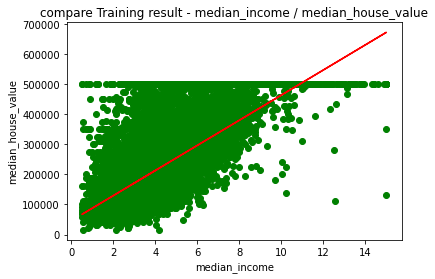

In [41]:
# task 7(D):  Plot the fitted model for training data as well as for test data to check if the fitted model satisfies the test data.
plt.scatter(x_tr, y_train, color = 'green')
plt.plot (x_tr, model.predict(x_tr), color = 'red')
plt.title ('compare Training result - median_income / median_house_value')
plt.xlabel('median_income')
plt.ylabel('median_house_value')
plt.show()

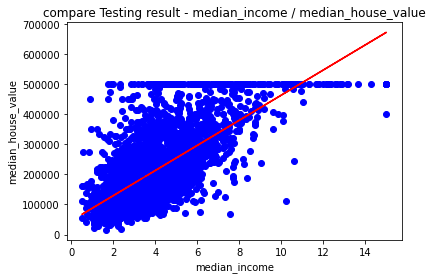

In [42]:
# let us visualize the Testing set
plt.scatter(x_ts, y_test, color = 'blue')
plt.plot (x_ts, model.predict(x_ts), color = 'red')
plt.title ('compare Testing result - median_income / median_house_value')
plt.xlabel('median_income')
plt.ylabel('median_house_value')
plt.show()